# IMPORTS 

In [24]:
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import tensorflow_addons as tfa
# load the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import matplotlib.pyplot as plt
import os
import re

# LOAD MODEL

In [21]:
ls ../saved_models/milk/logs/

ls: cannot access '../saved_models/milk/logs/': No such file or directory


tensorflow_addons.metrics.f_scores.F1Score

In [22]:
tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels.h5: 403 -- Forbidden

In [12]:
model=tf.keras.applications.VGG16(include_top=False,
                                  weights='imagenet',
                                  classes=1000)

In [8]:
model = tf.keras.applications.ResNet50(
                    include_top=False,
                    weights="imagenet",
                    input_tensor=None,
#                     input_shape=(224,224,3),
                    pooling=None,
                    classes=1000)

# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    try:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)
    except Exception as e:
        pass
#         print(layer)

# data prepration

### DATA GENERATOR FROM DIRECTORY

In [ ]:
def preprocessing_fun(img):
    dst = cv2.fastNlMeansDenoisingColored(img.astype(np.uint8), None, 10, 10, 7, 21)
#         print('image denoised')
    return dst

def load_data_from_dir(train_data_dir = '/workspace/data/brand/milk/train-val',
                           test_data_dir = '/workspace/data/brand/milk/test'):
    img_height = 224
    img_width=224
    batch_size = 64
    list_clasess = sorted({x for x in os.listdir(train_data_dir) if re.search('[0-9]+', x)})

    test_datagen = ImageDataGenerator(
#             rescale=1./255,
    )

    validation_datagen = ImageDataGenerator(
#             rescale=1./255,
          validation_split=0.2)

    train_datagen = ImageDataGenerator(
#             rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        fill_mode="nearest",
        zca_whitening=False,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        preprocessing_function=ResNet50.preprocessing_fun,
        validation_split=0.2) # set validation split

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        seed=1,
        classes=list_clasess,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training') # set as training data

    validation_generator = validation_datagen.flow_from_directory(
        train_data_dir, # same directory as training data
        target_size=(img_height, img_width),
        batch_size=batch_size,
        seed=1,
        classes=list_clasess,
        class_mode='categorical',
        subset='validation') # set as validation data

    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_height, img_width),
        seed=1,
        batch_size=1,
        classes=list_clasess,
        class_mode='categorical',
            )

    dataset = dict([('train', train_generator),
                ('validation', validation_generator),
                ('test',test_generator),
                ('num_classes',train_generator.num_classes),
                ('mapping', train_generator.class_indices)])
    return dataset

In [ ]:

# def dataloader(train_data_dir = '/workspace/data/brand/milk_images'):
#     img_height = 224
#     img_width=224
#     batch_size = 64

#     test_datagen = ImageDataGenerator(rescale=1./255,)
    
#     validation_datagen = ImageDataGenerator(rescale=1./255,
#                                             validation_split=0.2)

#     train_datagen = ImageDataGenerator(rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         validation_split=0.2) # set validation split

#     train_generator = train_datagen.flow_from_directory(
#         train_data_dir,
#         target_size=(img_height, img_width),
#         seed=1,
#         batch_size=batch_size,
#         class_mode='categorical',
#         subset='training') # set as training data

#     validation_generator = validation_datagen.flow_from_directory(
#         train_data_dir, # same directory as training data
#         target_size=(img_height, img_width),
#         batch_size=batch_size,
#         seed=1,
#         class_mode='categorical',
#         subset='validation') # set as validation data
    
#     test_generator = test_datagen.flow_from_directory(
#         test_data_dir,
#         target_size=(img_height, img_width),
#         seed=1,
#         batch_size=1,
#         class_mode='categorical',
#             )
#     return train_generator, validation_generator, test_generator

#     # model.fit_generator(
#     #     train_generator,
#     #     steps_per_epoch = train_generator.samples // batch_size,
#     #     validation_data = validation_generator, 
#     #     validation_steps = validation_generator.samples // batch_size,
#     #     epochs = nb_epochs)

In [ ]:
a = load_data_from_dir()

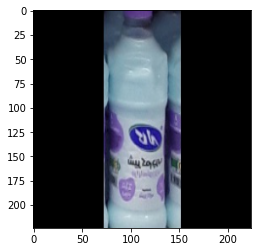

In [20]:
plt.imshow(train_generator.__next__()[0][0])

In [21]:
# redefine model to output right after the first hidden layer


# VISUAL FEATUR MAP ON TEST IMAGE  

In [22]:
len(model.layers)

175

In [23]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model

model = tf.keras.applications.ResNet50(

                    include_top=False,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=(224,224,3),
                    pooling=None,
                    classes=1000)

(1, 112, 112, 64)


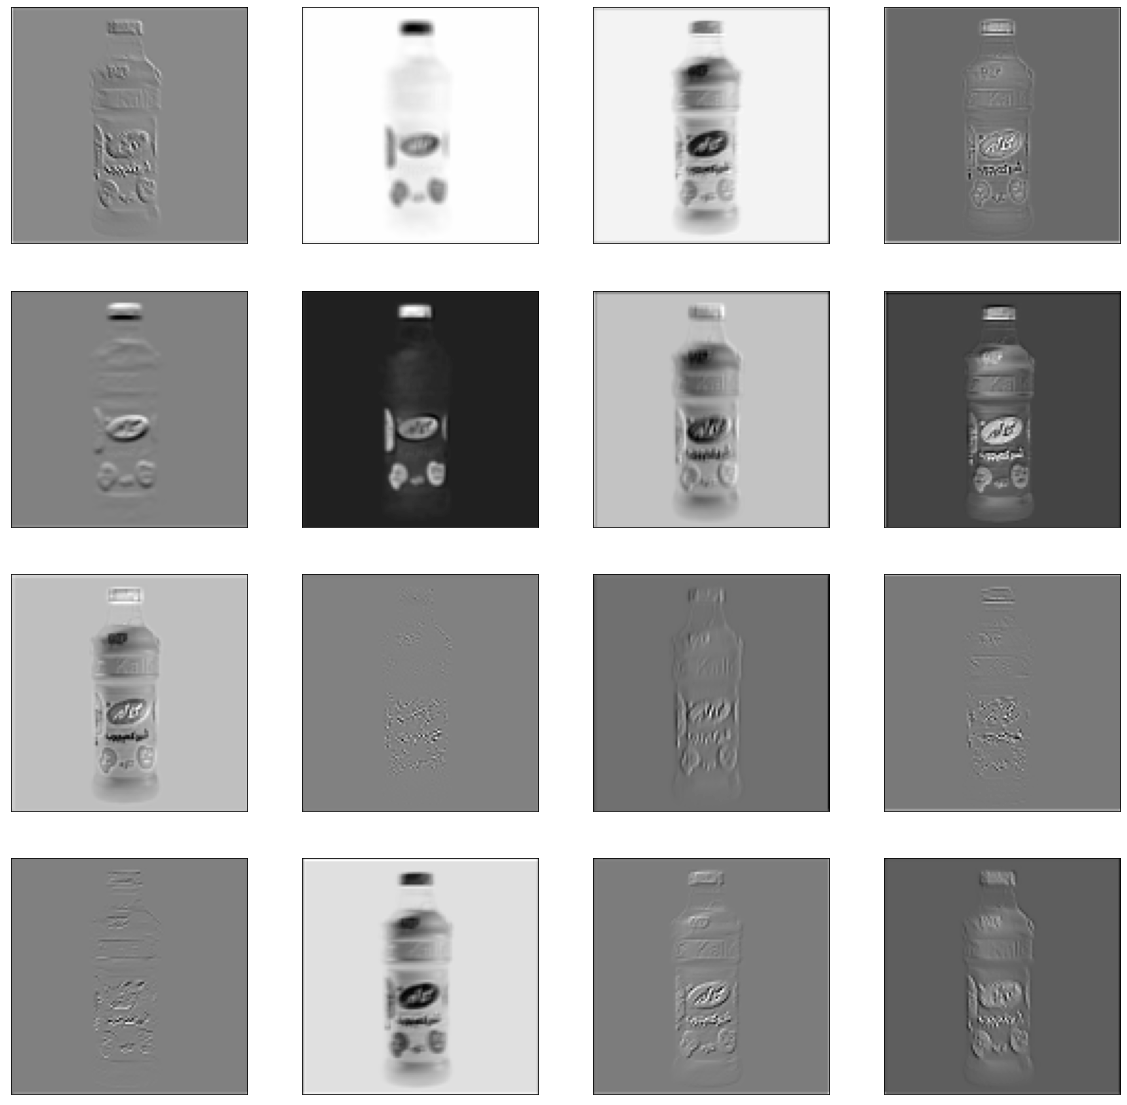

(1, 114, 114, 64)


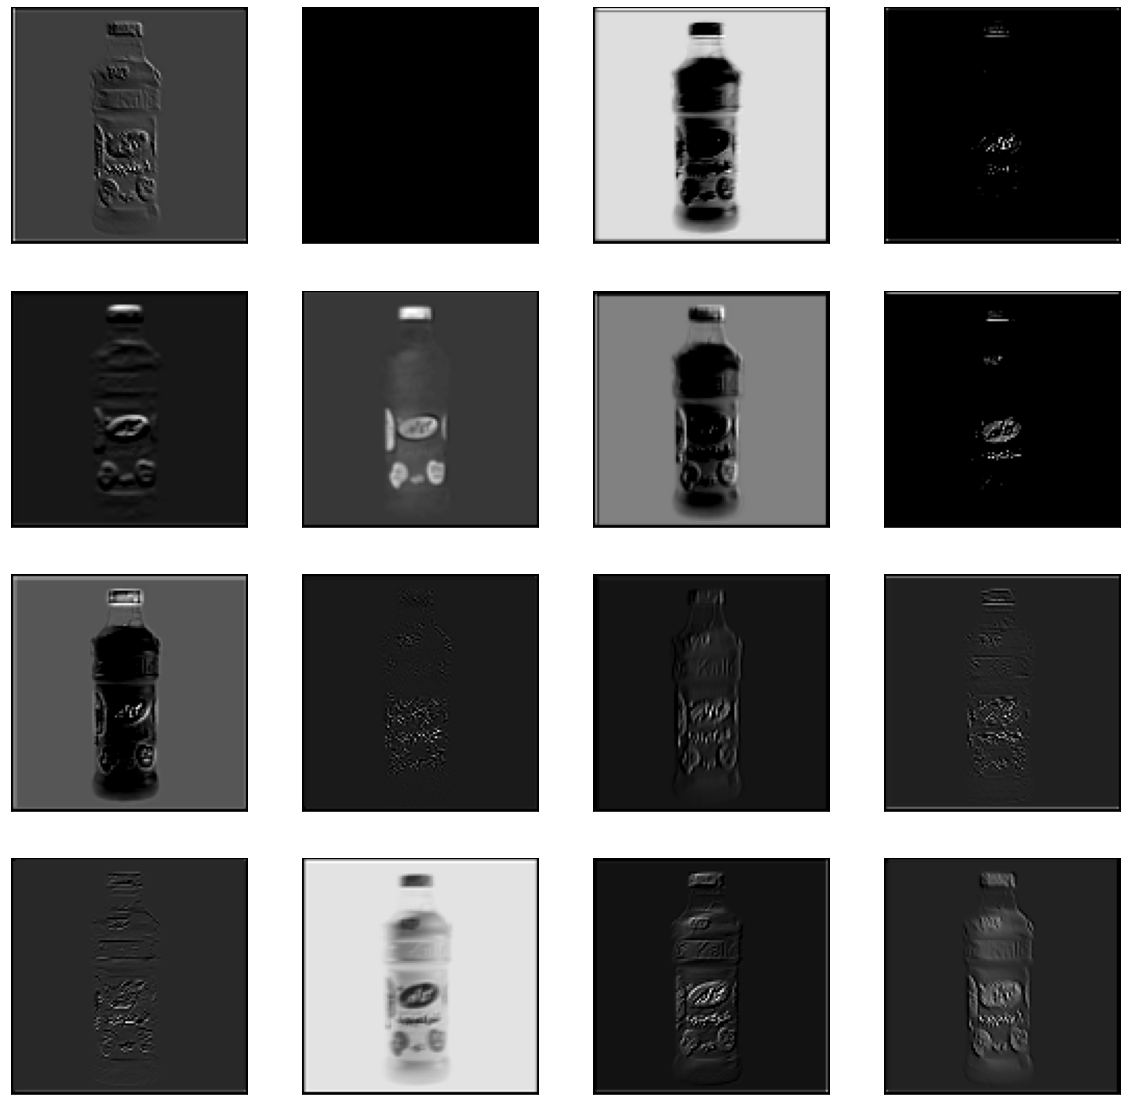

(1, 56, 56, 64)


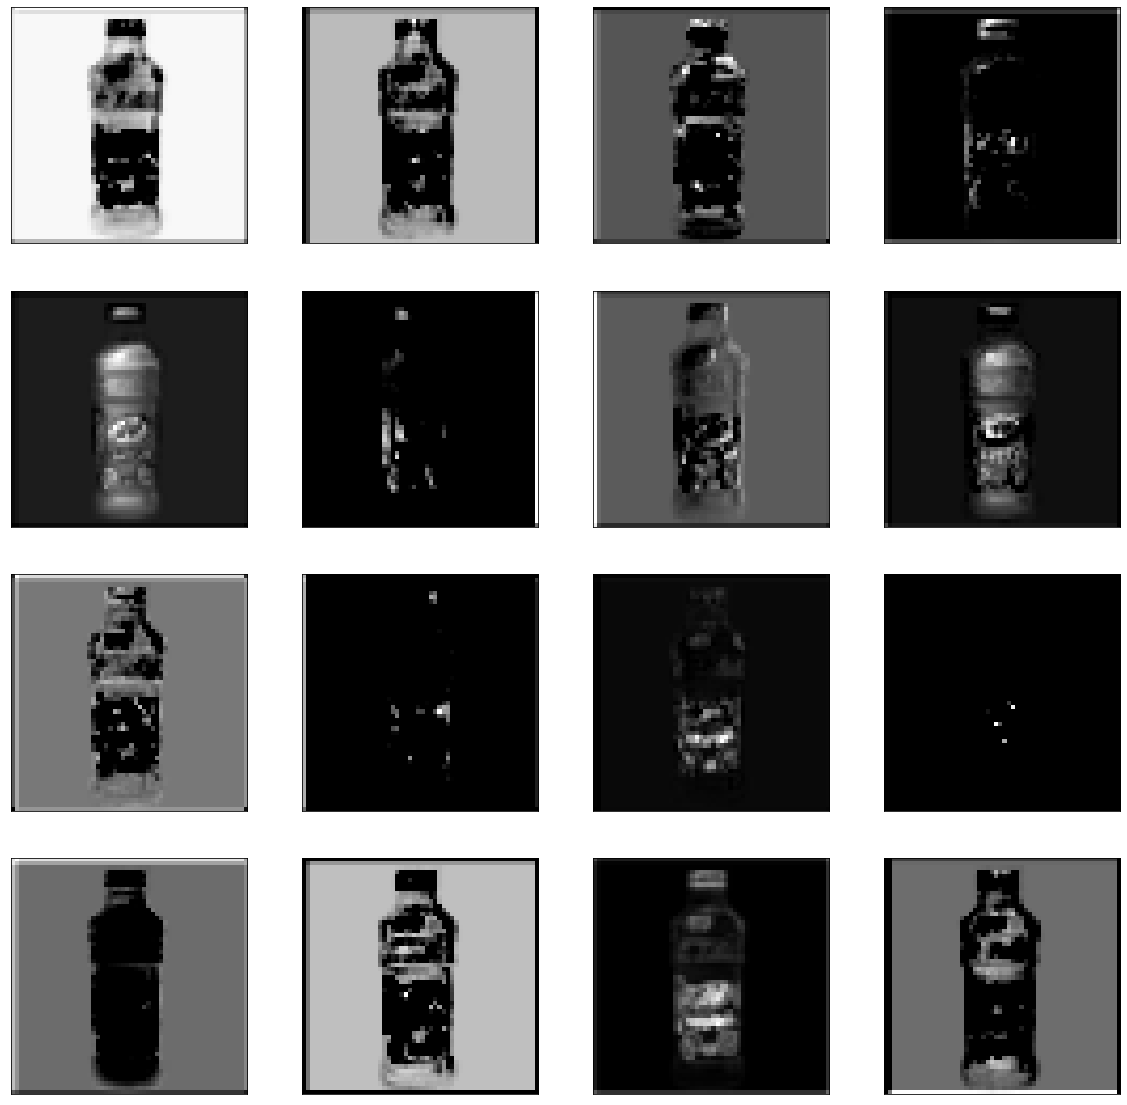

(1, 56, 56, 256)


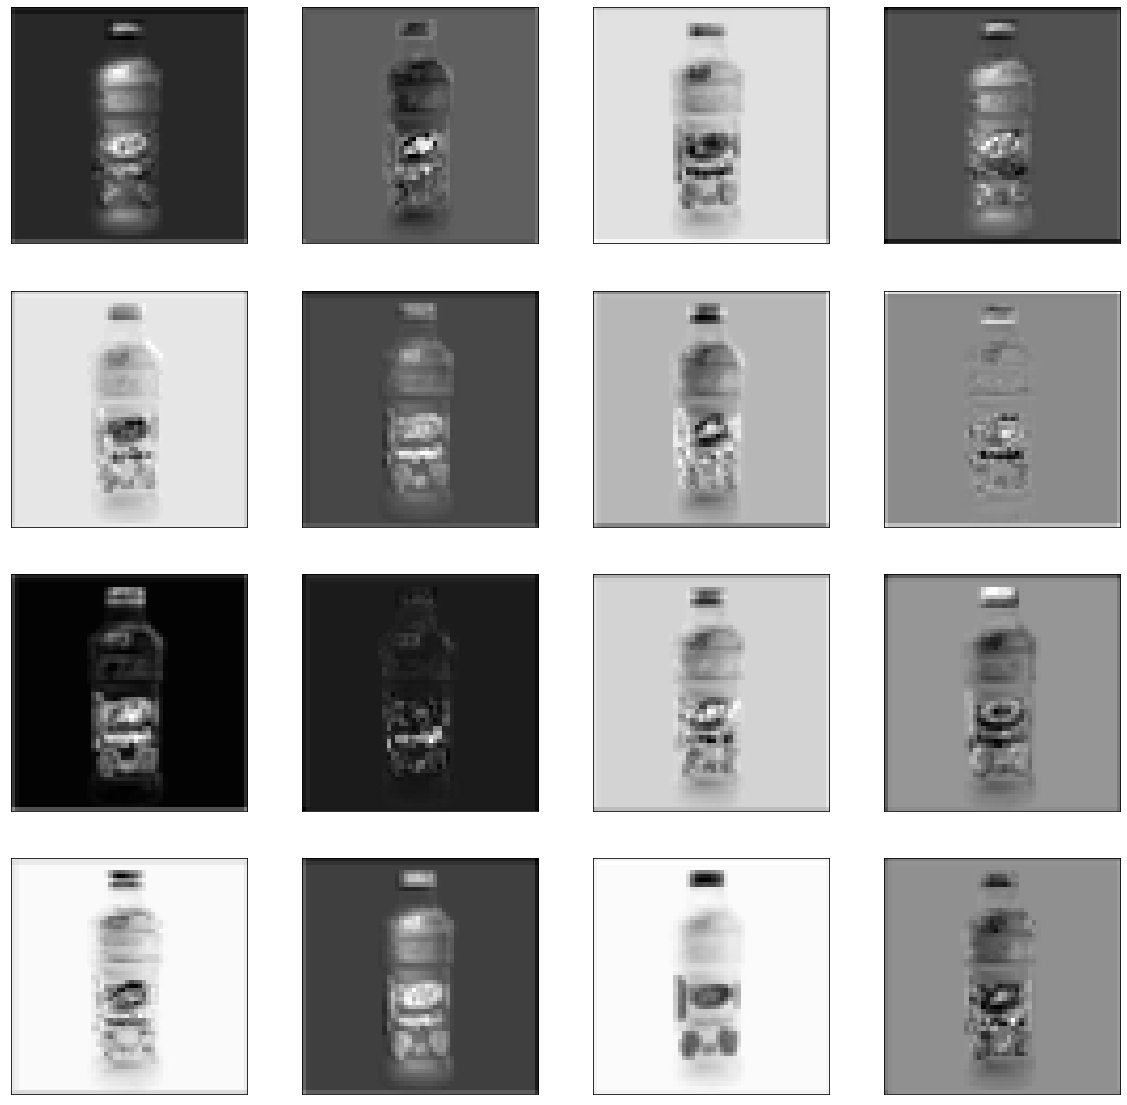

(1, 56, 56, 256)


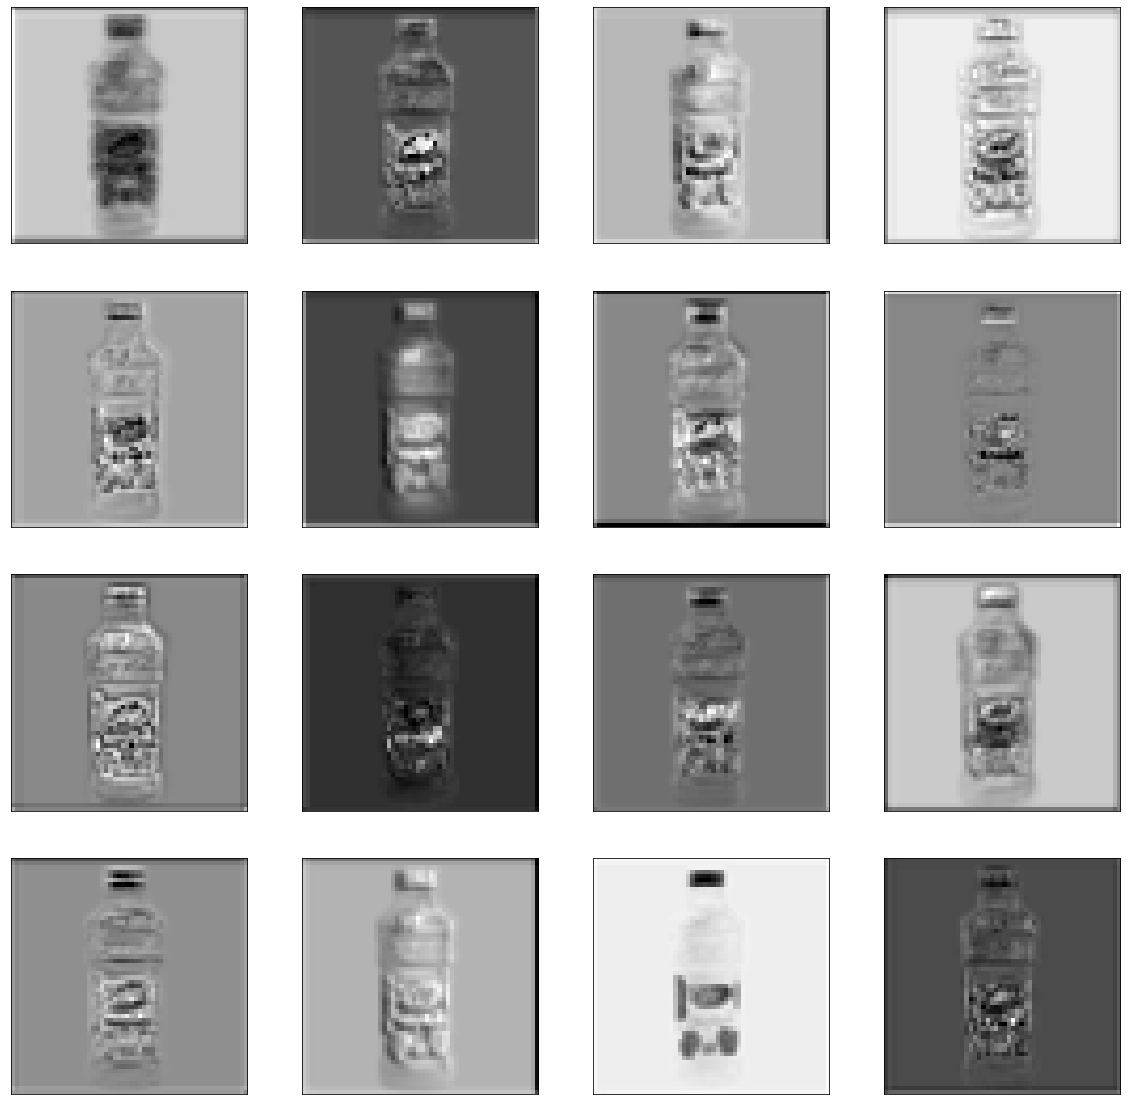

In [24]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
# ixs = [1, 2,3,4,5, 8, 12, 18]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('./test_images/hph-255690-a.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 4

for fmap in feature_maps:
    ix = 1
    print(fmap.shape)
    plt.figure(figsize=(20,20))
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    pyplot.show()

# FINE TUNE 

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img

In [26]:
img = load_img('./test_images/hph-255690-a.jpg', target_size=(224, 224))

In [27]:
base_model = tf.keras.applications.ResNet50(

                    include_top=False,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=(224,224,3),
                    pooling=None,
                    classes=1000)
base_model.trainable=False

In [36]:
train, validation = dataloader()

Found 8082 images belonging to 142 classes.
Found 1952 images belonging to 142 classes.


In [43]:
num_classes = np.unique(train.classes).shape[0]

In [44]:
inputs = keras.Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [46]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(train, epochs=20, validation_data=validation)

Epoch 1/20
127/127 [==============================] - 124s 947ms/step - loss: 4.7919 - categorical_accuracy: 0.0549 - val_loss: 4.3582 - val_categorical_accuracy: 0.0963
Epoch 2/20
127/127 [==============================] - 89s 697ms/step - loss: 4.4528 - categorical_accuracy: 0.0942 - val_loss: 4.2086 - val_categorical_accuracy: 0.1204
Epoch 3/20
127/127 [==============================] - 92s 721ms/step - loss: 4.2831 - categorical_accuracy: 0.0994 - val_loss: 4.1128 - val_categorical_accuracy: 0.1122
Epoch 4/20
127/127 [==============================] - 88s 693ms/step - loss: 4.1784 - categorical_accuracy: 0.1173 - val_loss: 4.0295 - val_categorical_accuracy: 0.1419
Epoch 5/20
127/127 [==============================] - 93s 730ms/step - loss: 4.1001 - categorical_accuracy: 0.1219 - val_loss: 3.9679 - val_categorical_accuracy: 0.1440
Epoch 6/20
127/127 [==============================] - 85s 666ms/step - loss: 4.0292 - categorical_accuracy: 0.1231 - val_loss: 3.8947 - val_categorical_ac

In [47]:
history = _

<AxesSubplot:>

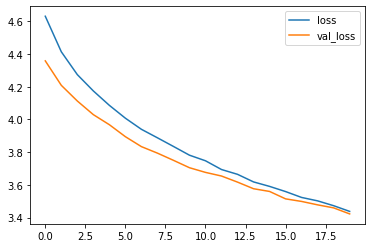

In [52]:
import pandas as pd
df = pd.DataFrame(model.history.history)
df[['loss','val_loss']].plot()

In [34]:
# from IPython.display import Image
# Image("test_images/hph-255690-a.jpg")

# cherk

In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
from numba import jit,njit,vectorize

In [169]:
model = tf.keras.applications.ResNet50(

                    include_top=False,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=(224,224,3),
                    pooling=None,
                    classes=1000)

# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [170]:
x = np.random.randint(0,100,(10,224,224,3))
y = np.random.randint(0,2,(10,1))

In [171]:
features = model.predict(x)

In [179]:
features.reshape(10,-1).shape

(10, 100352)